# Step 1: Importing the Relevant Libraries

In [1]:
import numpy as np
# Visulaization Library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Machine learning modules
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Step 2: Data Inspection

In [2]:
# Loading train and test data
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST_FINAL.csv")

In [3]:
# Checking the rows and columns
train.shape,test.shape

((188340, 10), (22265, 8))

**We have 188340 rows and 10 columns in Train set whereas Test set has 22265 rows and 8 columns.**

In [4]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [5]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64

**We don't have have any null values**

In [6]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 4


In [7]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 2


# Step 3: Data Cleaning

In this step we check missing values of each columns which are suitable for machine learning module. If they are not we will modify/ clean the train and data set.

In [8]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

the above summuray says that their are no null values are present in both the data set

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


# Step 4: Exploratory Data Analysis

In [12]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [13]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [14]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


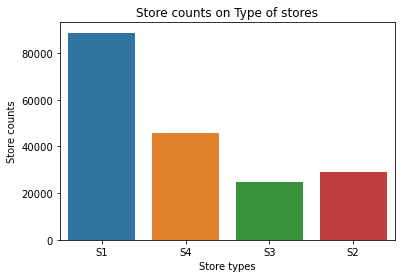

In [15]:
# count of store_types
sns.countplot(x ='Store_Type', data = train)

plt.title("Store counts on Type of stores")
plt.xlabel("Store types")
plt.ylabel("Store counts")

plt.show()

In [16]:
#train['Store_Type'].value_counts()

    S1 --> 88752
    S2 --> 45924
    S3 --> 28896
    S4 --> 24768
comparing all type of store_types, the S1 type stores are more and S3 type stores are less

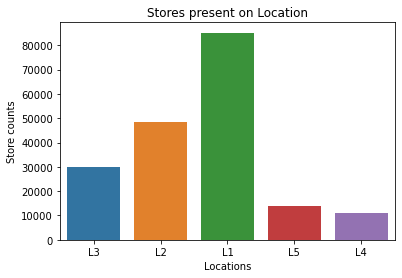

In [17]:
#counting stores on each location
sns.countplot(x ='Location_Type', data = train)

plt.title("Stores present on Location")
plt.xlabel("Locations")
plt.ylabel("Store counts")

plt.show()

In [18]:
#train['Location_Type'].value_counts()

the stores are more on L1 location and less on L4 location

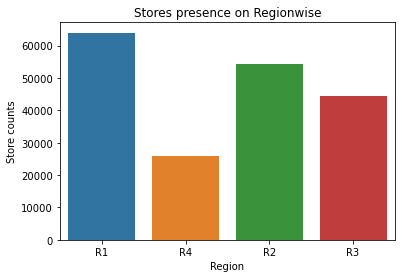

In [19]:
#counting stores on each 'Region Code'
sns.countplot(x ='Region_Code', data = train)

plt.title("Stores presence on Regionwise")
plt.xlabel("Region")
plt.ylabel("Store counts")

plt.show()

Form above count we see in R1 region more stroes are present and less in R4 region

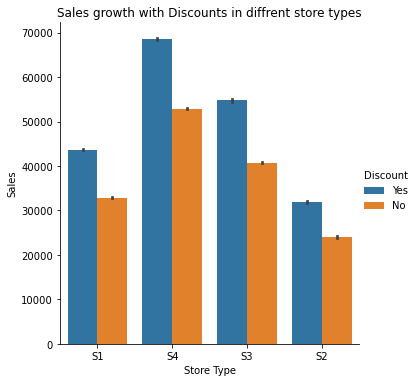

In [20]:
# sales occurs when Discount presence in store types
sns.catplot(x="Store_Type", y="Sales", hue="Discount", kind="bar", data=train)

plt.title("Sales growth with Discounts in diffrent store types")
plt.xlabel("Store Type")
plt.ylabel("Sales")

plt.show()

If their is a Discount is on/off the S4 type store got more sales and S2 type store is less.
But in all type of stores where discount is on the sales are more while comparing when their is no discount

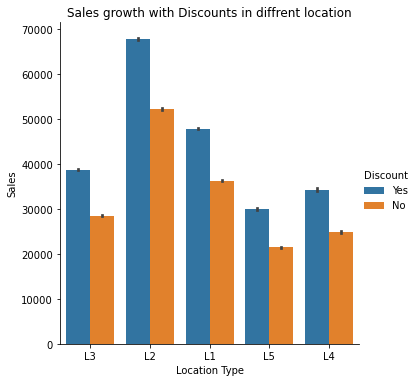

In [21]:
# sales occurs when Discount presence in different locations
sns.catplot(x="Location_Type", y="Sales", hue="Discount", kind="bar", data=train)

plt.title("Sales growth with Discounts in diffrent location")
plt.xlabel("Location Type")
plt.ylabel("Sales")

plt.show()

As usual the sales are more when discount is presence but in L2 location more sales occured when disscount is on.

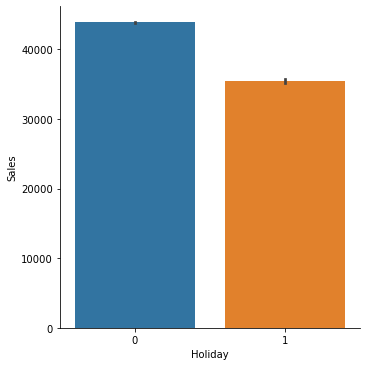

In [22]:
sns.catplot(x="Holiday", y="Sales", kind="bar", data=train)
plt.show()

0 : yes, 1: No
Surprisingly sales are more on non-Holidays date.

In between march to may 2019 the sales are occured more

In [23]:
#deviding the Date column in year, month, and date and changing thier data type as Float.
# for train data
train[["year", "month", "day"]] = train["Date"].str.split("-", expand = True).astype('int64')

#for test data
test[["year", "month", "day"]] = train["Date"].str.split("-", expand = True).astype('int64')

In [24]:
# droping the ID, #order and Date columns from both test and train data
#ID and order data columns do not cause any harm to the train dataset and have lots of unique values till end 
train = train.drop(['ID','Date','#Order'], axis=1)

# for test data only Date column is droped
test = test.drop('Date', axis=1)

In [25]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,year,month,day
0,1,S1,L3,R1,1,Yes,7011.84,2018,1,1
1,253,S4,L2,R1,1,Yes,51789.12,2018,1,1
2,252,S3,L2,R1,1,Yes,36868.20,2018,1,1
3,251,S2,L3,R1,1,Yes,19715.16,2018,1,1
4,250,S2,L3,R4,1,Yes,45614.52,2018,1,1


In [26]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,year,month,day
0,T1188341,171,S4,L2,R3,0,No,2018,1,1
1,T1188342,172,S1,L1,R1,0,No,2018,1,1
2,T1188343,173,S4,L2,R1,0,No,2018,1,1
3,T1188344,174,S1,L1,R4,0,No,2018,1,1
4,T1188345,170,S1,L1,R2,0,No,2018,1,1


In [27]:
train.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales', 'year', 'month', 'day'],
      dtype='object')

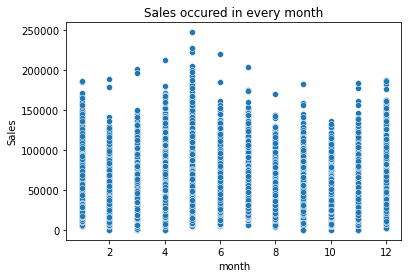

In [28]:
#sales based on month
sns.scatterplot(x ='month', y= 'Sales', data=train)
plt.title('Sales occured in every month')
plt.show()

their is high sales in may month

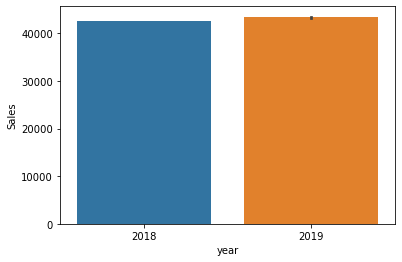

In [33]:
sns.barplot(x ='year', y= 'Sales', data=train)
plt.show()

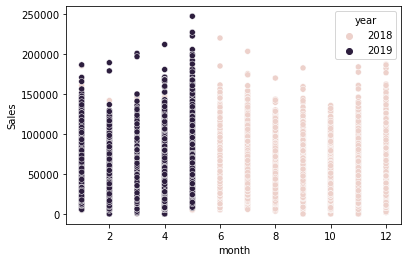

In [30]:
sns.scatterplot(x ='month', y= 'Sales',hue= 'year', data=train)
plt.show()

# Step 5: Building Model

In [34]:
# Labelencoding
encoder = LabelEncoder()

for i in train.columns: 
    if train[i].dtype == 'object': 
        encoder.fit_transform(list(train[i].values))
        train[i] = encoder.transform(train[i].values)
         
        for j in train.columns:
            if train[j].dtype == 'int':
                train[j] = train[j].astype('float64')

for k in test.columns:
    if test[k].dtype == 'object': 
        encoder.fit_transform(list(test[k].values))
        test[k] = encoder.transform(test[k].values)
         
        for m in test.columns:
            if test[m].dtype == 'int':
                test[m] = test[m].astype('float64')

In [35]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,year,month,day
0,1,0.0,2.0,0.0,1,1.0,7011.84,2018,1,1
1,253,3.0,1.0,0.0,1,1.0,51789.12,2018,1,1
2,252,2.0,1.0,0.0,1,1.0,36868.20,2018,1,1
3,251,1.0,2.0,0.0,1,1.0,19715.16,2018,1,1
4,250,1.0,2.0,3.0,1,1.0,45614.52,2018,1,1


In [36]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,year,month,day
0,0.0,171,3.0,1.0,2.0,0,0.0,2018,1,1
1,1.0,172,0.0,0.0,0.0,0,0.0,2018,1,1
2,2.0,173,3.0,1.0,0.0,0,0.0,2018,1,1
3,3.0,174,0.0,0.0,3.0,0,0.0,2018,1,1
4,4.0,170,0.0,0.0,1.0,0,0.0,2018,1,1


In [37]:
# Seperate Features and Target
X = train.drop('Sales',axis=1)
y = train['Sales']

test_predict = test.drop('ID',axis=1)

In [38]:
#Using normalization to X and test_predict

scalar = MinMaxScaler()
X_scalar = pd.DataFrame(scalar.fit_transform(X),columns = X.columns)

# Normalization scalar for test prediction data
test_scalar = pd.DataFrame(scalar.fit_transform(test_predict),columns = test_predict.columns)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_scalar,y,test_size=0.2,random_state=22)

## ML models

In [50]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(learning_rate=0.09,
                                n_estimators=12000,random_state=42,objective='reg:squarederror', booster='gbtree')]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','Random Forest Regressor', 'XGB Regressor']

rmse_list = []

In [51]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [52]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [53]:
evaluation

,Model,RMSE
0,Linear Regression,13782.683974
1,Ridge Regression,13782.679608
2,Lasso Regression,13782.577470
3,K Neighbors Regressor,10447.521648
4,Decision Tree Regressor,11320.623348
5,Random Forest Regressor,8682.736821
6,XGB Regressor,7415.083464


after trying 7 modules the Root mean square error is very low for XGB regressor so we choose this module for test data 

__creating model for validation check and for submission purpose__

In [54]:
model1 = XGBRegressor(learning_rate=0.09,
                                n_estimators=12000,random_state=42,
                     objective='reg:squarederror', booster='gbtree')
model1.fit(X_train, y_train)

pred_train = model1.predict(X_train) 
pred_test = model1.predict(X_test) 

In [56]:
import math
# Evaluating Train Data
train_r2_score = metrics.r2_score(y_train, pred_train)
print(f'Train R2_score: {train_r2_score}')

train_mse = metrics.mean_squared_error(y_train, pred_train)
print(f'Train MSE : {train_mse}')

train_RMSE = math.sqrt(metrics.mean_squared_error(y_train, pred_train)) 
print(f'Train RMSE : {train_RMSE}')

Train R2_score: 0.935878435339494
Train MSE : 21945276.68140385
Train RMSE : 4684.578602329547


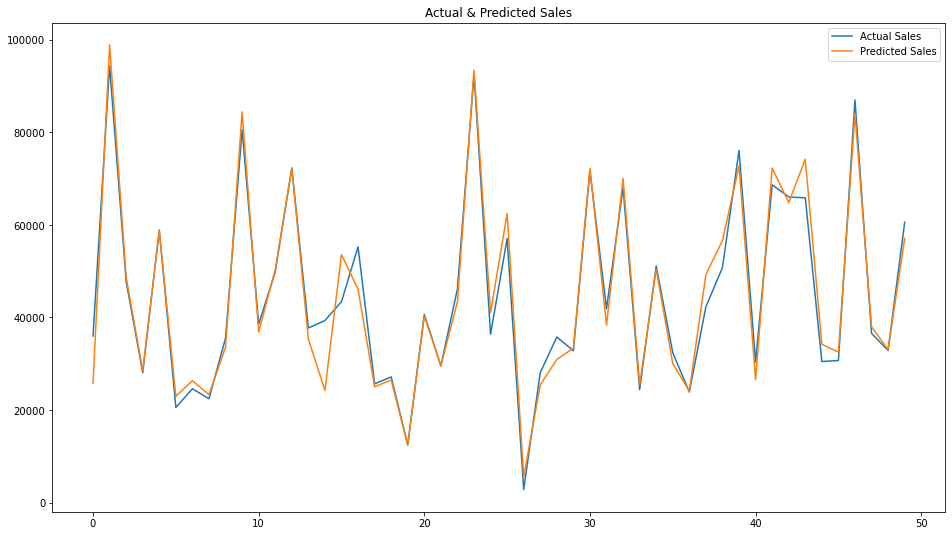

In [57]:
#Visualization for Actual and Predicted Sales in Training Data
train = pd.DataFrame(
    {'Predicted Sales':pred_train, 'Actual Sales':y_train}
)

fig= plt.figure(
    figsize=(16, 9)
)

train = train.reset_index()
train = train.drop(
    ['index'],axis=1
)

plt.plot(train[:50])
plt.legend(['Actual Sales','Predicted Sales'])
plt.title('Actual & Predicted Sales')
plt.show()


In [58]:
# Evaluating Test Data
test_r2_score = metrics.r2_score(y_test, pred_test)
print(f'Test R2_score: {test_r2_score}')

test_mse = metrics.mean_squared_error(y_test, pred_test)
print(f'Test MSE : {test_mse}')

test_RMSE = math.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(f'Test RMSE : {test_RMSE}')

Test R2_score: 0.8354762873506048
Test MSE : 54983462.77515726
Test RMSE : 7415.083463802498


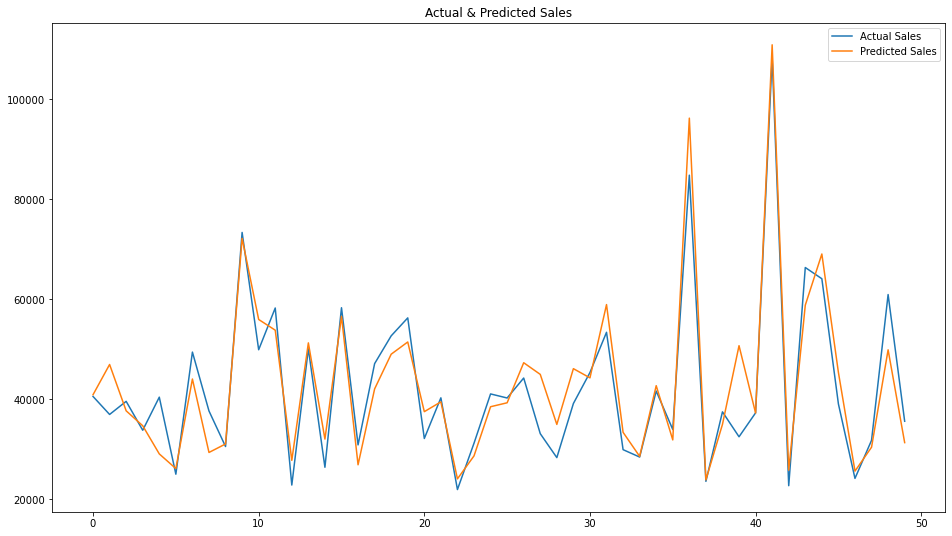

In [59]:
# Visualization for Actual and Predicted Sales in testing Data
test = pd.DataFrame(
    {'Predicted Sales':pred_test, 'Actual Sales':y_test}
)

fig= plt.figure(
    figsize=(16, 9)
)

test = test.reset_index()
test = test.drop(
    ['index'],axis=1
)

plt.plot(test[:50])
plt.legend(['Actual Sales','Predicted Sales'])
plt.title('Actual & Predicted Sales')
plt.show()


# Predicting test data

In [60]:
final_test = model1.predict(test_predict)

In [61]:
sub = pd.read_csv("SAMPLE.csv")

In [62]:
sub.columns

Index(['ID', 'Sales'], dtype='object')

In [63]:
sub.Sales = final_test
sub

,ID,Sales
0,T1188341,67757.195312
1,T1188342,34345.910156
2,T1188343,57058.144531
3,T1188344,46586.152344
4,T1188345,46586.152344
...,...,...
22260,T1210601,67757.195312
22261,T1210602,57058.144531
22262,T1210603,69005.695312
22263,T1210604,46586.152344


In [66]:
sub.to_csv('Submission.csv', index = False)

In [67]:
sub1 = pd.read_csv('Submission.csv')
sub1.head()

,ID,Sales
0,T1188341,67757.195
1,T1188342,34345.910
2,T1188343,57058.145
3,T1188344,46586.152
4,T1188345,46586.152
